In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from flaml import AutoML
ds=xr.open_dataset('chirps-v2_monthly_africa_2.5.nc')
df1=ds['precip'].to_dataframe().reset_index()
df=ds['precip'].to_dataframe().reset_index()
len_nan=df['precip'].isna().sum().sum()
df=df.sample(frac=0.1,random_state=42)
x_train,x_test=df.dropna(subset='precip'),df[df['precip'].isna()]
y_train=df[~df['precip'].isna()]['precip']


In [5]:
automl_reg = AutoML()
automl_reg.fit(x_train, y_train, task="regression", verbose=False,time_budget=100)
y_pred = automl_reg.predict(x_test)
print(y_pred)

[9.4917837  9.42560045 9.41335728 ... 9.4071859  9.40565454 9.42560045]


In [6]:
df1=ds['precip'].to_dataframe().reset_index()
y_pred=np.random.choice(y_pred,size=len_nan,replace=True)
print(len(y_pred))
#print(df1['precip'].isna().sum().sum())
df1.loc[df1['precip'].isna(), 'precip'] = y_pred
df1

23838189


C:\Users\USER\AppData\Local\Temp\ipykernel_5144\1338614597.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.38822178 9.38508872 9.4071859  ... 9.45000703 9.4917837  9.38822178]' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df1.loc[df1['precip'].isna(), 'precip'] = y_pred


,time,latitude,longitude,precip
0,1981-01-01,-39.874996,-19.875004,9.388222
1,1981-01-01,-39.874996,-19.625004,9.385089
2,1981-01-01,-39.874996,-19.375004,9.407186
3,1981-01-01,-39.874996,-19.125004,9.405655
4,1981-01-01,-39.874996,-18.875004,9.405655
...,...,...,...,...
49823995,2024-03-01,39.874992,53.875000,13.489058
49823996,2024-03-01,39.874992,54.125000,11.317730
49823997,2024-03-01,39.874992,54.375000,10.786901
49823998,2024-03-01,39.874992,54.625000,11.267644


In [17]:
print(df1['precip'].isna().sum().sum())

0


In [7]:
ds1=df1.set_index(['time','latitude','longitude']).to_xarray()
print(ds1['precip'])


<xarray.DataArray 'precip' (time: 519, latitude: 320, longitude: 300)> Size: 399MB
array([[[ 9.38822178,  9.38508872,  9.4071859 , ...,  9.4071859 ,
          9.38822178, 14.58051511],
        [ 9.41335728,  9.86906042,  9.45000703, ...,  9.4071859 ,
          9.40565454,  9.4071859 ],
        [ 9.40565454,  9.4071859 ,  9.38822178, ...,  9.4071859 ,
          9.21568358,  9.38508872],
        ...,
        [ 9.40565454,  9.4071859 ,  9.35684309, ..., 16.50267982,
         15.63272762, 21.60180855],
        [ 9.41335728,  9.38508872,  9.38822178, ..., 14.34459591,
         20.46517754, 21.91301346],
        [ 9.22221195,  9.40565454,  9.4071859 , ..., 16.8042984 ,
         20.19076157, 22.03339386]],

       [[ 9.4071859 ,  9.38508872,  9.4071859 , ...,  9.40565454,
          9.41335728,  9.42560045],
        [ 9.38508872,  9.4071859 ,  9.4071859 , ...,  9.40565454,
          9.38508872,  9.42560045],
        [ 9.42560045,  9.45153838,  9.4071859 , ...,  9.4071859 ,
          9.4071859 

In [8]:
from scipy.stats import norm
precip=ds1['precip']
mean=ds1['precip'].mean(dim='time')
std=ds1['precip'].std(dim='time')

def SPI (percip):
    mean=ds1['precip'].mean(dim='time')
    std=ds1['precip'].std(dim='time')
    spi=(percip-mean)/std
    return spi
spi=SPI(precip)
print(spi)


<xarray.DataArray 'precip' (time: 519, latitude: 320, longitude: 300)> Size: 399MB
array([[[-1.38444414e-01, -3.13332000e-01, -1.06381450e-01, ...,
         -1.04982696e-01, -1.57033550e-01,  1.04138972e+01],
        [-3.23959394e-02,  7.51602690e-01, -2.37930543e-03, ...,
         -9.95956568e-02, -1.09780529e-01, -6.50138842e-02],
        [-1.01267661e-01, -1.19089231e-01, -1.66733355e-01, ...,
         -7.74438750e-02, -5.07204332e-01, -1.62277230e-01],
        ...,
        [-9.26384797e-02, -6.71817974e-02, -2.24893044e-01, ...,
          7.02236796e-01,  6.32851675e-01,  1.08538254e+00],
        [-6.14426341e-02, -1.54579881e-01, -1.96019423e-01, ...,
          3.22555961e-01,  7.47664547e-01,  8.83464555e-01],
        [-5.32166521e-01, -1.24621975e-01, -1.49268750e-01, ...,
          4.99132191e-01,  7.23539514e-01,  9.11998376e-01]],

       [[-9.25332175e-02, -3.13332000e-01, -1.06381450e-01, ...,
         -1.07985261e-01, -1.11370469e-01, -7.77554955e-02],
        [-1.35421740

In [9]:
spi_1980_2000=spi.sel(time=slice('1980-01-01','2000-12-31')).mean(dim='time')
spi_2000_2020=spi.sel(time=slice('2000-01-01','2020-12-31')).mean(dim='time')
spi_different=(spi_1980_2000)-(spi_2000_2020)
spi_different

<xarray.DataArray 'precip' (latitude: 320, longitude: 300)> Size: 768kB
array([[-0.05250967,  0.01749161,  0.01745936, ..., -0.05250228,
        -0.02510588, -0.01343536],
       [-0.07138174, -0.02031351, -0.04589171, ...,  0.030677  ,
         0.00136318,  0.0260062 ],
       [ 0.00592727,  0.13472036,  0.07627291, ..., -0.0090017 ,
         0.06500981, -0.03546225],
       ...,
       [-0.02621532, -0.02591547, -0.05581558, ..., -0.25127771,
        -0.2719986 , -0.24915557],
       [-0.16762871,  0.12103252,  0.11465933, ..., -0.23534972,
        -0.23079932, -0.24796291],
       [ 0.07292537,  0.07096547,  0.10183877, ..., -0.23666234,
        -0.2315392 , -0.25448796]])
Coordinates:
  * latitude   (latitude) float32 1kB -39.87 -39.62 -39.37 ... 39.38 39.62 39.87
  * longitude  (longitude) float32 1kB -19.88 -19.63 -19.38 ... 54.62 54.88

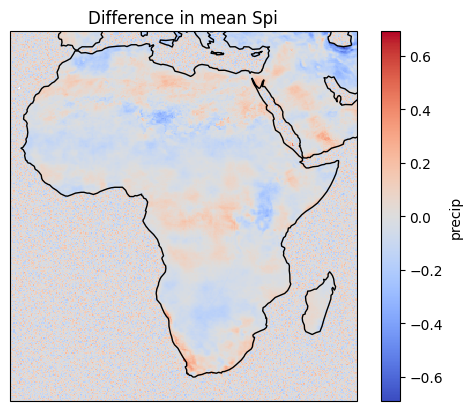

In [10]:
import cartopy.crs as ccrs
plt.Figure(figsize=(10,6))
ax=plt.axes(projection=ccrs.PlateCarree())
spi_different.plot(ax=ax,cmap='coolwarm',transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Difference in mean Spi')
plt.show()

In [18]:
import pymannkendall as mk

def mk_test_on_series (data):
    result=mk.original_test(data)
    return result.trend


spi_sample = spi.isel(latitude=slice(0, 1000), longitude=slice(0, 1000))


trend_r_sample = xr.apply_ufunc(mk_test_on_series,spi_sample,input_core_dims=[['time']],vectorize=True)

  



In [17]:
import cartopy.crs as ccrs
plt.figure(figsize=(10,8))
ax=plt.axes(projection=ccrs.PlateCarree())
trend_r_sample.plot(ax=ax,transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.title('trend_sample')
plt.show()